# Active learning using kili-technology

In this tutorial, we will see results of active learning applied to object detection.

It is no secret that machine learning models, especially deep learning models, need lots of training data. In the real world, unsupervised data is plenty while supervised data is rare and costly to obtain. Thus, you may be interested in using active learning : it is the task of choosing well the data samples to annotate to get the best performance given a fixed number of annotations.

At kili-technology, we develop the best annotation platform, to quickly get a production ready dataset. One of the features of our python - graphQL API is the ability to order the data samples to annotate, by giving them priority. This allows the use of active learning algorithms. We will show you how to do that here :

## Creating the project

In [7]:
!git clone https://github.com/mDuval1/SSD

Cloning into 'SSD'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 878 (delta 19), reused 50 (delta 15), pack-reused 807
Receiving objects: 100% (878/878), 797.58 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (469/469), done.


In [22]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_models = glob.glob('SSD/outputs/*')

In [10]:
list_df = []
for data_model in data_models:
    model_results = glob.glob(f'{data_model}/results/*')
    for model_result in model_results:
        df_model = pd.read_csv(model_result)
        df_model['model'] = model_result.split('/')[-1]
        df_model['data'] = data_model.split('/')[-1]
        list_df.append(df_model)

In [11]:
df = pd.concat(list_df).reset_index()

In [12]:
df

,index,strategy,args,step,mAP,model,data
0,0,uncertainty_aldod_sampling,{},1,0.194674,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
1,1,uncertainty_aldod_sampling,{},2,0.258754,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
2,2,uncertainty_aldod_sampling,{},3,0.306085,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
3,3,uncertainty_aldod_sampling,{},4,0.333593,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
4,4,uncertainty_aldod_sampling,{},5,0.368577,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
5,5,uncertainty_aldod_sampling,{},6,0.392480,uncertainty_aldod_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
6,0,random_sampling,{},1,0.192371,random_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
7,1,random_sampling,{},2,0.252794,random_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
8,2,random_sampling,{},3,0.306718,random_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712
9,3,random_sampling,{},4,0.326186,random_sampling-20200621151902.txt,mobilenet_v2_ssd320_voc0712


Text(0.5, 1.0, 'mobilenet_v2_ssd320_voc0712')

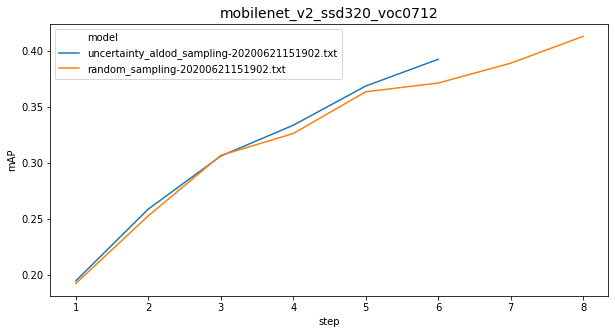

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='step', y='mAP', hue='model', data=df)
plt.title(df.loc[0, 'data'], fontsize=14)